I chose to keep Portuguese for my personal notes, because I don't have the objective to compete with such rich material exposed here, so I think that keeping my focus just in order to remember important concepts is my best goal.

Optei em manter o português para minhas anotações pessoasi, pois não tenho como objetivo concorrer com tão rico material exposto aqui, portanto penso que manter meu foco apenas no intuito de relembrar conceitos importantes é meu melhor objetivo.


### Passos que devem ser seguidos para construir um modelo:

* **Definir**: Qual tipo de modelo será adotado? 
* **Fit**: Capturar padrões dos dados obtidos. Este é o cerne do processo de modelagem.
* **Predict**: É exatamente o que parece ser.
* **Avaliar**: Determinar quanto acurado é previsão do modelo.

### Abaixo código base para projetos que usam o pacote Pandas

No próprio código os comentários ajudam a compreender cada linha. Quando o código for obtido ja com os comentários em inglês, os materei originalmente, porém caso sejam códigos escritos ou reescritos por mim colocarei o código em português.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

O código acima o que interessa para continuar é apenas as duas linha de código, onde são carregados os pacotes *numpy*, e *pandas*, depois retornarei aqui para falar um pouco mais sobre cada pacote, aqui mesmo no Kadle, tem um excelente tutorial sobre o [Pandas, clicando aqui](https://www.kaggle.com/learn/pandas).

Hà também o link https://www.w3resource.com/pandas que possui um excelente manual.


## Carregando os dados e vendo as Séries disponíveis

A seguir mostro como pode ser carregado dados, no caso estou usando o formato mais usado no Kaggle que é 'CSV', o código é simples e auto explicátivo. Veja que a linha onde importo o Pandas está comentada, já que ele já foi carregado anteriormente neste Notebook, portanto não é preciso recarrega-lo no mesmo Notebook.

A última linha imprime os nomes das colunas/séries de dados definido no arquivo carregado.

In [ ]:
#import pandas as pd

melbourne_file_path = '../input/melbourne-housing-snapshot/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
melbourne_data.columns

## Alguns conceitos iniciais

Há alguns conceitos importante a se consolidar antes de continuarmos, sao conceitos bastante comuns a quem trabalha com programação e banco de dados. Tais conceitos já estão sendo usando, eles estão representados na imagem abaixo obtida no site [W3Resource.org](https://www.w3resource.com/pandas/series/series.php)

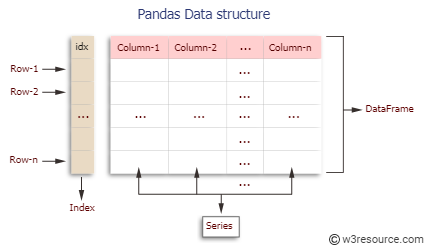

Um *DataFrame* é composto por *Series*, que são as colunas indexadas com os dado do registro. Cada *Linha* é um Registro e possui seu próprio *Indice*, independete se a origem de dados tenha algum típo de *Id*

Para exercício, a seguir apresento o DataFrame e a seguir uma das Séries. Veja que estou usando a função `print()`, pois preciso imprimir uma mensagem e em seguida os dados, porém não seria preciso usa-la se fosse apenas os dados.

In [ ]:
print("Imprimindo o conteudo de uma variável que possui um DataFrame:")
print(melbourne_data)
print("Imprimindo uma das séries contidas no DataFrame:")
print(melbourne_data.Price)

## Limpando Séries ou Registros Incompletos

Precisamos tomar cuidado com registros que possam vir a ter dados faltantes. Por isso é importante termos um conhecimento prévio do conteúdo que iremos lidar, se suspeitar que alguma variável/coluna venha vazia ou anulada, procure desenvolver um código que trate tais dados, se não, remova o registro ou a coluna inteira, se ela não for importante.

No [tutorial original](https://www.kaggle.com/dansbecker/your-first-machine-learning-model) que estou seguindo não há detalhes sobre a função a seguir, tais detalhes estão em outro tutorial citado por ele, irei resumir um pouco aqui, e mais detalhes podem ser obtidos no [tutorial do Kaggle sobre o Pandas](https://www.kaggle.com/learn/pandas) e detalhes gerais sobre a função  no link: https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php

Veja que Dataframe é o dado obtido com o Pandas, quando se carrega um arquivo, ou quando se precessa um conjunto de colunas e este se torna outro conjunto, tais conjuntos são chamados de DataFrame.

Já a função `dropna`, remove tais colunas ou registros, conforme é parametrizado na chamada.

no código abaixo é pasado o parametro `axis=0`, tal parâmetro diz ao Pandas para remover o registro (index), caso algum registro tenha o dado faltante. Já o parametro `inplace=true` informa que o processamento é interno no DataFrame e que não precisa retornar um novo.

In [ ]:
melbourne_data.dropna(axis=0,inplace=True)

Você pode acessar uma série de duas formas, usando a notação por ponto (Dot Notation), como foi feito acima para 'Price', ou pode acessar como se fosse um Array, o que seria escrito da seguinte forma: `melbourne_data['Price']` ambos os formatos retornam o mesmo objeto *Series*

### O que iremos prever

Por convenção a série de dados que iremos prever, ou digamos *adivinhar*, fica armazenado em uma variável de nome `y`, sendo assim execute o código a seguir, para separar em `y` nossa  ***prediction target***.

In [ ]:
y = melbourne_data.Price

### Escolhendo nossas características

Ja ás **Series** que são usadas para promover o ***Target Prection*** são chamadas de ***Features***, estas séries são trabalhadas em conjuntos e podem ser destacadas do *DataFrame* original. Veja que acima nos usamos a função `dropna` para fazer uma limpeza no *DataFrame* Original, poderiamos ter feito esta limpesa jogando para uma variável temporária e posteriormente retirado desta variável, veja que o que importa é que nos leve ao resultado final da forma mais eficiente e o resultado real.

Para selecionar os nossos Features varmos criar uma lista de nomes de Features, que devem ser os mesmo nomes das *Séries* presente no nosso *DataFrame*.

In [ ]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

Por convenção, os features ficam em uma variável chamada `X`. Para obter todos os features de uma vez só usamos a convenção similar arrays.

In [ ]:
X = melbourne_data[melbourne_features]

Vamos antes de continuar, rever nossos dados, para isso usaremos duas funções do **DataFrame**, `describe()` que descreve os dados obtidos através de algumas analises estatísticas que resume a tendência central, dispersão, distribuição dos dados e `head()` que retorna apenas os primeiros dados de nosso *DataFrame*;

Veja no manual do Pandas detalhes sobre outros típos de dados além de númericos, já que isso interfere na metodológia para calculos estatísticos usados e o que é apresentado.

In [ ]:
melbourne_data.describe()

Veja que para cada série de dados, foram impressas 5 linhas, ou 5 registros, na seguinte ordem:

* count: Contagem de registros, como pode ver todas as séries tem o mesmo valor, a diferença neste valores indica a ausência de algum dado.
* mean: É a média  dos valores que representa estes dados, portanto espera-se que sejam inteiros.
* std: É o desvio padrão
* min: O menor valor encontrado
* 25%: 1° quartil 
* 50%: 2° quartil
* 75%: 3e quartil
* max: o maior valor encontrado